In [167]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification


In [168]:
df = pd.DataFrame(np.random.rand(50,2)*10,columns = ['X','Y'])
df['target'] = np.random.randint(0,2,50)


In [169]:
df.head()

,X,Y,target
0,2.965470,1.521961,1
1,6.970597,6.804711,1
2,2.688241,1.151858,0
3,1.086377,5.145557,1
4,8.640172,0.794656,1


In [170]:
df['W'] = 1/df.shape[0]

In [171]:
x = df.iloc[:,:2].values
y = df.iloc[:,2].values

In [172]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

def intialize(df):
    clf = DecisionTreeClassifier(max_depth = 1)
    x = df.iloc[:,:2].values
    y = df.iloc[:,2].values
    clf.fit(x,y)
    df['predict'] = clf.predict(df.iloc[:,:2])
    return clf

In [173]:

def create_range(row, alpha):
    if row['target'] == row['predict']:
        return row['W'] * np.exp(-alpha)
    else:
        return row['W'] * np.exp(alpha)

def create_new_df(df):
    weights = df['W'].values
    Error = np.sum(weights[df['target'].values != df['predict'].values])
    alpha = 1 / 2 * np.log2((1 - Error) / (Error + 0.0000001))
    print(f"Error: {Error}")
    print(f"Alpha: {alpha}")

    df['update_w'] = df.apply(create_range, alpha=alpha, axis=1)
    df['normalized'] = df['update_w'] / df['update_w'].sum()

    df['start_range'] = df['normalized'].cumsum() - df['normalized']
    df['end_range'] = df['normalized'].cumsum()

    random_ind = np.random.rand(df.shape[0])
    indices = []

    for ran in random_ind:
        for i, row in df.iterrows():
            if row['start_range'] <= ran and row['end_range'] > ran:
                indices.append(i)

    
    return df.iloc[indices,0:3]







C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Error: 0.36000000000000004
Alpha: 0.4150372989045602


<Axes: >

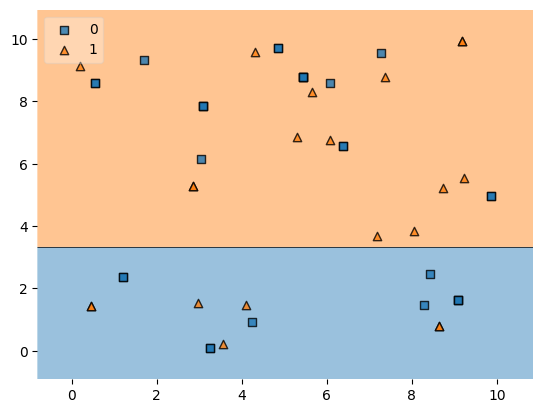

In [174]:
#Model 2
dt2 = intialize(df)
second_df = create_new_df(df)


plot_decision_regions(
    second_df.iloc[:, :2].values,
    second_df['target'].values,
    dt2,
    legend=2
)


[Text(0.5, 0.75, 'x[1] <= 3.327\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.75, 0.25, 'gini = 0.451\nsamples = 35\nvalue = [12, 23]')]

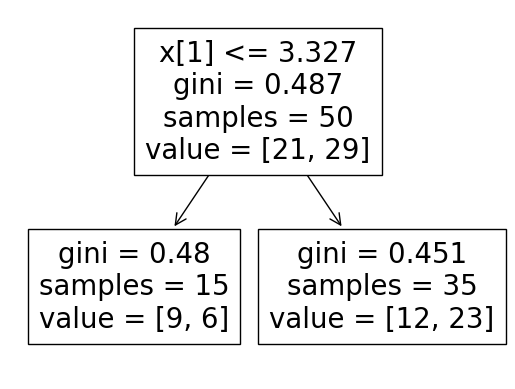

In [175]:
plot_tree(dt2)

In [176]:
second_df['W'] = 1/second_df.shape[0]

second_df.head()

,X,Y,target,W
28,0.464259,1.449730,1,0.02
38,4.090284,1.484018,1,0.02
26,3.259706,0.087457,0,0.02
21,6.374233,6.570602,0,0.02
23,7.278573,9.542949,0,0.02


C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Error: 0.36000000000000004
Alpha: 0.4150372989045602


<Axes: >

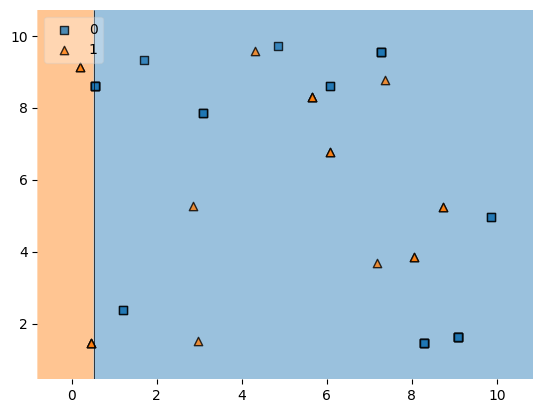

In [177]:
#model 3

dt3 = intialize(second_df)

three_df = create_new_df(second_df)

plot_decision_regions(three_df.iloc[:,:2].values,three_df['target'].values,clf=dt3,legend=2)

[Text(0.5, 0.75, 'x[0] <= 0.511\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.473\nsamples = 47\nvalue = [29, 18]')]

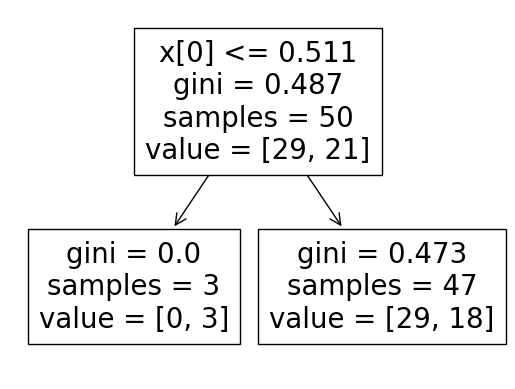

In [178]:
plot_tree(dt3)

In [188]:
#models

n = 10
dataframes= []
train_models = []



def models(df):
    global n
    if n==0:
        return 
    else:
        t_dt = intialize(df)
        df['W'] = 1/df.shape[0]
        t_df = create_new_df(df)
        
        dataframes.append(t_df)
        train_model.append(t_dt)
        n= n-1
        return models(t_df)


        

In [191]:
models(three_df)

C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Error: 0.27999999999999997
Alpha: 0.6812847820682858
Error: 0.23999999999999996
Alpha: 0.8314822057998105


C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Error: 0.12000000000000001
Alpha: 1.4372339578353872
Error: 0.0
Alpha: 11.626748332105768


C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Error: 0.0
Alpha: 11.626748332105768
Error: 0.0
Alpha: 11.626748332105768


C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Error: 0.0
Alpha: 11.626748332105768
Error: 0.0
Alpha: 11.626748332105768


C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Error: 0.0
Alpha: 11.626748332105768
Error: 0.0
Alpha: 11.626748332105768


[Text(0.5, 0.75, 'x[0] <= 0.511\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.429\nsamples = 45\nvalue = [31, 14]')]

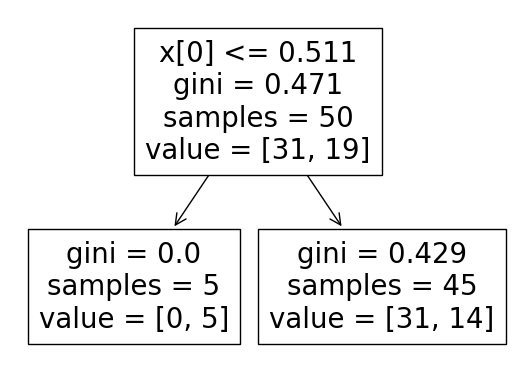

In [192]:
plot_tree(train_model[0])



<Axes: >

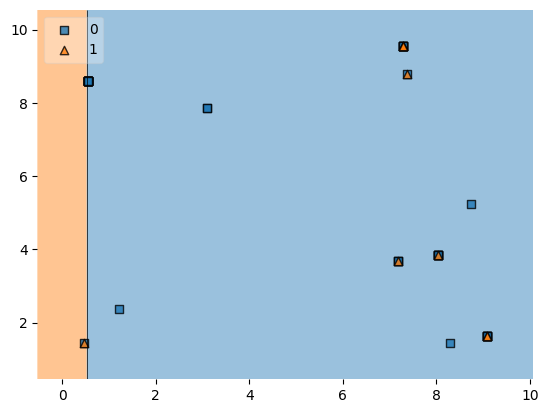

In [194]:
plot_decision_regions(dataframes[0].iloc[:,:2].values,dataframes[1].iloc[:,2].values,model[0],legend=2)